<a href="https://colab.research.google.com/github/krishgit042023/Loan-Approval-Classification/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# prompt: load train data

dataset = pd.read_csv('/content/train.csv')

dataset.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
dataset.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
dataset.shape

(58645, 13)

In [ ]:
# prompt: apply encoding to the categorical features

from sklearn.preprocessing import LabelEncoder
categorical_features = dataset.select_dtypes(include=['object']).columns
for col in categorical_features:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
dataset.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


In [ ]:
# prompt: set the features and target variable

X = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']

In [ ]:
print(X)

          id  person_age  person_income  person_home_ownership  \
0          0          37          35000                      3   
1          1          22          56000                      2   
2          2          29          28800                      2   
3          3          30          70000                      3   
4          4          22          60000                      3   
...      ...         ...            ...                    ...   
58640  58640          34         120000                      0   
58641  58641          28          28800                      3   
58642  58642          23          44000                      3   
58643  58643          22          30000                      3   
58644  58644          31          75000                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
0                    0.0            1           1       6000          11.49   
1                    6.0            3           2

In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
58640    0
58641    1
58642    1
58643    0
58644    0
Name: loan_status, Length: 58645, dtype: int64


In [ ]:
print(X.shape)
print(y.shape)

(58645, 12)
(58645,)


In [ ]:
# prompt: split the dataset into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(46916, 12)
(11729, 12)
(46916,)


(11729,)

In [ ]:
# prompt: apply features scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# prompt: apply random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(y_pred)

accuracy_score(y_test, y_pred)

[0 0 0 ... 0 0 0]


0.9492710375991134

In [ ]:
# prompt: apply lightGBM

#!pip install lightgbm

import lightgbm as lgb

# Initialize the LightGBM classifier
classifier = lgb.LGBMClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 6674, number of negative: 40242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142254 -> initscore=-1.796692
[LightGBM] [Info] Start training from score -1.796692
LightGBM Accuracy: 0.9546423395003837


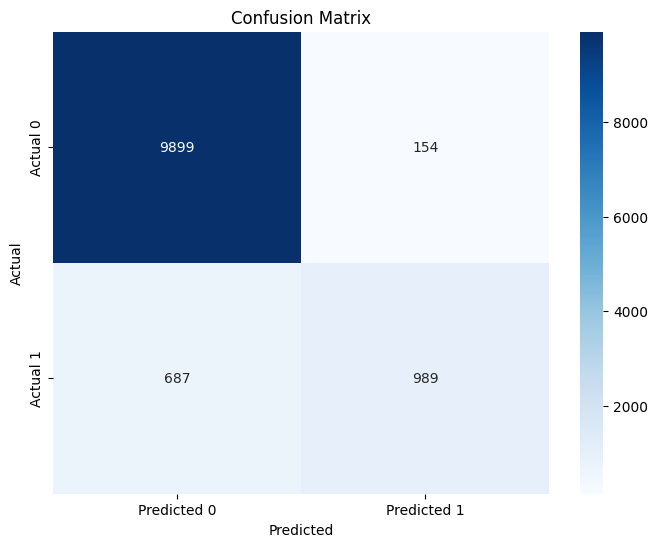

In [ ]:
# prompt: create the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are already defined from your previous code
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt:  precision , recall , f1 score based on the confusion matrix

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined from your previous code
# and the confusion matrix 'cm' is calculated

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8652668416447944
Recall: 0.5900954653937948
F1 Score: 0.7016672578928698


**Test Data Operation**

In [ ]:
dataset_test = pd.read_csv('/content/test.csv')

dataset_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [ ]:
dataset_test.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
dataset_test.shape

(39098, 12)

In [ ]:
# prompt: apply encoding to the categorical features of dataset_test dataset

# Assuming 'dataset_test' is already loaded as a pandas DataFrame

categorical_features_test = dataset_test.select_dtypes(include=['object']).columns

for col in categorical_features_test:
    le = LabelEncoder()
    # Use the same LabelEncoder fitted on the training data if possible.
    # Otherwise, fit on the test data.
    try:
        dataset_test[col] = le.fit_transform(dataset_test[col])
    except Exception as e:  #Handle potential errors (e.g., unseen labels)
        print(f"Error encoding column '{col}': {e}")
        # Handle the error, for example, by filling with a specific value or removing the column

dataset_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4


In [ ]:
# prompt: apply lightbgm model to dataset_test dataframe

# Assuming X_test from the training data is used for scaling the test data
dataset_test_scaled = sc.transform(dataset_test)

# Make predictions on the scaled test data
y_pred_test = classifier.predict(dataset_test_scaled)

y_pred_test

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
submission

,loan_status
0,1
1,0
2,1
3,0
4,0
...,...
39093,0
39094,0
39095,0
39096,0


In [ ]:
# prompt: put the id column from dataset_test in the submission file

# Assuming 'dataset_test' and 'submission' are already defined from your previous code

# Assuming 'id' is the column name in dataset_test that contains the IDs.
# If the ID column has a different name, replace 'id' with the correct column name.
submission['id'] = dataset_test['id']

# Reorder columns so 'id' comes first
submission = submission[['id', 'loan_status']]

# Save the updated submission file
submission.to_csv('submission.csv', index=False)
submission

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0
